# Geospatial data - Try it notebook #2
## Making thematic maps using indirect georeferencing
Here we're going to make a map of new COVID case rates for a particular date for all the states in the continental US.

As usual, we start by importing....

In [1]:
# This code cell starts the necessary setup for Hour of CI lesson notebooks.
# First, it enables users to hide and unhide code by producing a 'Toggle raw code' button below.
# Second, it imports the hourofci package, which is necessary for lessons and interactive Jupyter Widgets.
# Third, it helps hide/control other aspects of Jupyter Notebooks to improve the user experience
# This is an initialization cell
# It is not displayed because the Slide Type is 'Skip'

from IPython.display import HTML, IFrame, Javascript, display
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import Layout

import getpass # This library allows us to get the username (User agent string)

# import package for hourofci project
import sys
sys.path.append('../../supplementary') # relative path (may change depending on the location of the lesson notebook)
import hourofci

# load javascript to initialize/hide cells, get user agent string, and hide output indicator
# hide code by introducing a toggle button "Toggle raw code"
HTML(''' 
    <script type="text/javascript" src=\"../../supplementary/js/custom.js\"></script>
    
    <style>
        .output_prompt{opacity:0;}
    </style>
    
    <input id="toggle_code" type="button" value="Toggle raw code">
''')

In [2]:
import geopandas
import json
import pandas

Now we'll download the state boundary geometry from the Census Bureau and read it into a geopandas geodataframe called 'states'. In the code chunk below we also:

- Print the dimension of the table (rows = 50 states plus DC and Puerto Rico)
- Display the first 5 rows of the file. Note the geography column at the right. 

In [3]:
states = geopandas.read_file("http://www2.census.gov/geo/tiger/GENZ2014/shp/cb_2014_us_state_20m.zip")
print("The dimension (rows, columns) of the states geodataframe is ", states.shape)
states.head()

The dimension (rows, columns) of the states geodataframe is  (52, 10)


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


Now we'll make a quick plot to check our data are OK. 

In Python, there are many ways to make maps. In Try-it notebook #1, we used the ipyleaflet package to make an interactive map. 

This time we'll use a simple plot module in the matplotlib package that comes in the basic install. There is no need to import this package. It plots long lat pairs as simple cartesian coordinates in a rectangular frame. 

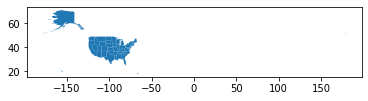

In [4]:
states.plot()

Hmm, that's not very pretty. Let's constrain this map to only the continental US. 

There are many ways to do this. Here we'll just mask out the continental area by clipping any rows that fall outside a rectangle defined by the appropriate lat/long limits of the continental US. We'll use a geometry tool (Polygon) from the package shapely.

The dimension (rows, columns) of the states geodataframe is  (49, 10)


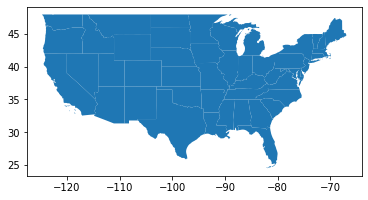

In [6]:
from shapely.geometry import Polygon
mask = Polygon([(-140, 20), (-140, 50), (-60, 50), (-60, 20), (-140, 20)])
states = geopandas.clip(states, mask)
print("The dimension (rows, columns) of the states geodataframe is ",states.shape)
states.plot()

Still not a great map, but at least we can see the shape of the country.

Now we'll get the COVID data. We can get it right from the main source everyone is accessing, Johns Hopkins University. Here is their highly-cited <a href = 'https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'> dashboard.</a>

In their daily updated data repository on GitHub, there are data for each state for every day since April 12 2020. To make a quick map here, we'll just get one day's data, say October 2, 2020. 

Descriptions of the data fields (columns) can be found <a href='https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/'>here.</a>

In [7]:
cases = pandas.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports_us/10-02-2020.csv')
cases.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-10-03 04:30:36,32.3182,-86.9023,157402,2550,67948.0,86200.0,1.0,3195.841071,1145601.0,NaN,1.627334,84000001,USA,23364.425368,NaN
1,Alaska,US,2020-10-03 04:30:36,61.3707,-152.4044,8073,57,5042.0,2974.0,2.0,1103.554805,469290.0,NaN,0.706057,84000002,USA,64150.530726,NaN
2,American Samoa,US,2020-10-03 04:30:36,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1616.0,NaN,NaN,16,ASM,2904.333136,NaN
3,Arizona,US,2020-10-03 04:30:36,33.7298,-111.4312,219763,5693,35553.0,178517.0,4.0,3019.254630,1478504.0,NaN,2.590518,84000004,USA,20312.700714,NaN
4,Arkansas,US,2020-10-03 04:30:36,34.9697,-92.3731,85779,1391,76186.0,8202.0,5.0,2842.431119,1054260.0,NaN,1.621609,84000005,USA,34934.674353,NaN


Notice there are several geographic references in these data, including a lat/long pair for each state. This is a point, which isn't a great way to represent a state's extent. So we need to join this to the boundary geometry we downloaded earlier. 

We'll join these two files using the name of the state as the key. First we have to determine what label is used on each column that contains the state names.

- Look back at the states table. What is the name of the column that contains the state names? (be sure to note the exact capitalization you see there). 
    
- Look at the cases table. What is the label of the column that contains the state names? 

Since these column labels need to be the same, we'll change the label in the cases table to match the states table with the following code:

In [8]:
cases = cases.rename(columns={'Province_State': 'NAME'})
cases.head()

,NAME,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-10-03 04:30:36,32.3182,-86.9023,157402,2550,67948.0,86200.0,1.0,3195.841071,1145601.0,NaN,1.627334,84000001,USA,23364.425368,NaN
1,Alaska,US,2020-10-03 04:30:36,61.3707,-152.4044,8073,57,5042.0,2974.0,2.0,1103.554805,469290.0,NaN,0.706057,84000002,USA,64150.530726,NaN
2,American Samoa,US,2020-10-03 04:30:36,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1616.0,NaN,NaN,16,ASM,2904.333136,NaN
3,Arizona,US,2020-10-03 04:30:36,33.7298,-111.4312,219763,5693,35553.0,178517.0,4.0,3019.254630,1478504.0,NaN,2.590518,84000004,USA,20312.700714,NaN
4,Arkansas,US,2020-10-03 04:30:36,34.9697,-92.3731,85779,1391,76186.0,8202.0,5.0,2842.431119,1054260.0,NaN,1.621609,84000005,USA,34934.674353,NaN


Now we'll merge these two files together using NAME as the common key. This will add the data for each state in the cases table to the row containing the data for the same state in the states table. After you execute the following command, scroll the table to the right and you'll see what happened.

In [9]:
states = states.merge(cases, on='NAME')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",...,809959.0,6.0,2090.525253,14868431.0,NaN,1.943553,84000006,USA,37629.953141,NaN
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",...,2542.0,11.0,2171.593584,394118.0,NaN,4.091087,84000011,USA,55843.933183,NaN
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",...,697250.0,12.0,3314.148041,5351521.0,NaN,2.044664,84000012,USA,24916.596194,NaN
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",...,313528.0,13.0,3019.885334,2970013.0,NaN,2.216234,84000013,USA,27973.011907,NaN
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",...,20393.0,16.0,2419.497892,311337.0,NaN,1.096258,84000016,USA,17421.694230,NaN


Excellent! Now we've got a single table that contains both the geometry and the data we want to map. Let's take a look at it on a map!

The next line of code will plot the state areas again, but this time colored according to the values in a particular column. We'll use Incident Rate (daily reported cases per 100,000).

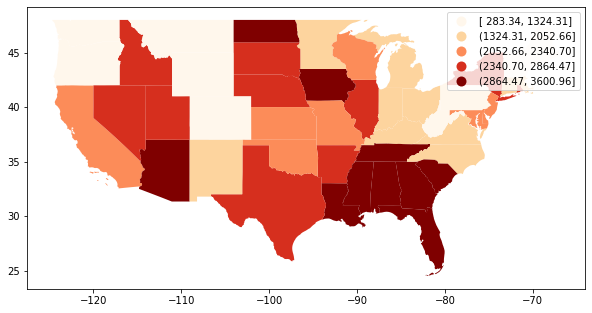

In [10]:
states.plot(column='Incident_Rate', cmap='OrRd', scheme='quantiles', legend=True, figsize=(10, 10))

Again, it's not a publication quality map, but it does show our data. The legend shows the quintile range values. Thus the 20% of the states with the lowest rates are in the pale yellow color, with values between 283 and 1324 cases per 100,000 population. The states in top 20% are shown in the dark brown color and their rates range from 2864 to 3601 per 100,000 population.

OK, nice maps! Let's now go back into the slides and dive deeper into geospatial data and learn about the many ways information about the world can be stored in a computer.

<a href="gd-6.ipynb" class="link-logging">Click here to go on to the next section.</a>